In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import tree

uploaded = files.upload()
df = pd.read_csv("car data.csv")
df.head()

df['Price_Class'] = pd.qcut(
    df['Selling_Price'], q=3, labels=['Low', 'Medium', 'High']
)

print(df['Price_Class'].value_counts())
df[['Selling_Price', 'Price_Class']].head(10)

df = df.drop(columns=['Car_Name', 'Selling_Price'])
df.head()

le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Price_Class']:
    df[col] = le.fit_transform(df[col])

df.head()

X = df.drop(columns=['Price_Class'])
y = df['Price_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print(tree.export_text(dt, feature_names=list(X.columns)))

plt.figure(figsize=(25, 12))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_limited,
    feature_names=X.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import tree

In [ ]:
uploaded = files.upload()
df = pd.read_csv("car data.csv")
df.head()

df['Price_Class'] = pd.qcut(
    df['Selling_Price'], q=3, labels=['Low', 'Medium', 'High']
)

print(df['Price_Class'].value_counts())
df[['Selling_Price', 'Price_Class']].head(10)

df = df.drop(columns=['Car_Name', 'Selling_Price'])
df.head()

le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Price_Class']:
    df[col] = le.fit_transform(df[col])

df.head()

X = df.drop(columns=['Price_Class'])
y = df['Price_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


KeyboardInterrupt: 

In [ ]:
uploaded = files.upload()
df = pd.read_csv("car data.csv")
df.head()

df['Price_Class'] = pd.qcut(
    df['Selling_Price'], q=3, labels=['Low', 'Medium', 'High']
)

print(df['Price_Class'].value_counts())
df[['Selling_Price', 'Price_Class']].head(10)

df = df.drop(columns=['Car_Name', 'Selling_Price'])
df.head()

Saving car data.csv to car data (1).csv
Price_Class
Medium    104
Low       100
High       97
Name: count, dtype: int64


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Class
0,2014,5.59,27000,Petrol,Dealer,Manual,0,Medium
1,2013,9.54,43000,Diesel,Dealer,Manual,0,Medium
2,2017,9.85,6900,Petrol,Dealer,Manual,0,High
3,2011,4.15,5200,Petrol,Dealer,Manual,0,Medium
4,2014,6.87,42450,Diesel,Dealer,Manual,0,Medium


Saving car data.csv to car data (2).csv
Price_Class
Medium    104
Low       100
High       97
Name: count, dtype: int64
=== Decision Tree ===
Accuracy: 0.881578947368421
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       1.00      0.96      0.98        25
           2       0.90      0.73      0.81        26

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



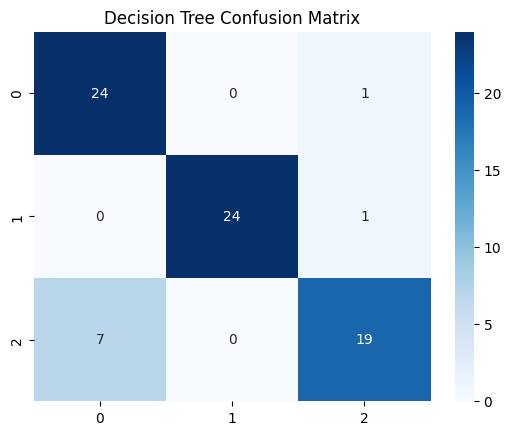

|--- Present_Price <= 3.46
|   |--- Kms_Driven <= 4050.00
|   |   |--- Present_Price <= 1.36
|   |   |   |--- class: 1
|   |   |--- Present_Price >  1.36
|   |   |   |--- class: 2
|   |--- Kms_Driven >  4050.00
|   |   |--- class: 1
|--- Present_Price >  3.46
|   |--- Present_Price <= 7.43
|   |   |--- Kms_Driven <= 17750.00
|   |   |   |--- Present_Price <= 5.93
|   |   |   |   |--- Present_Price <= 5.06
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Present_Price >  5.06
|   |   |   |   |   |--- Kms_Driven <= 3992.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Kms_Driven >  3992.50
|   |   |   |   |   |   |--- Kms_Driven <= 7632.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Kms_Driven >  7632.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- Present_Price >  5.93
|   |   |   |   |--- class: 0
|   |   |--- Kms_Driven >  17750.00
|   |   |   |--- Transmission <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Transm

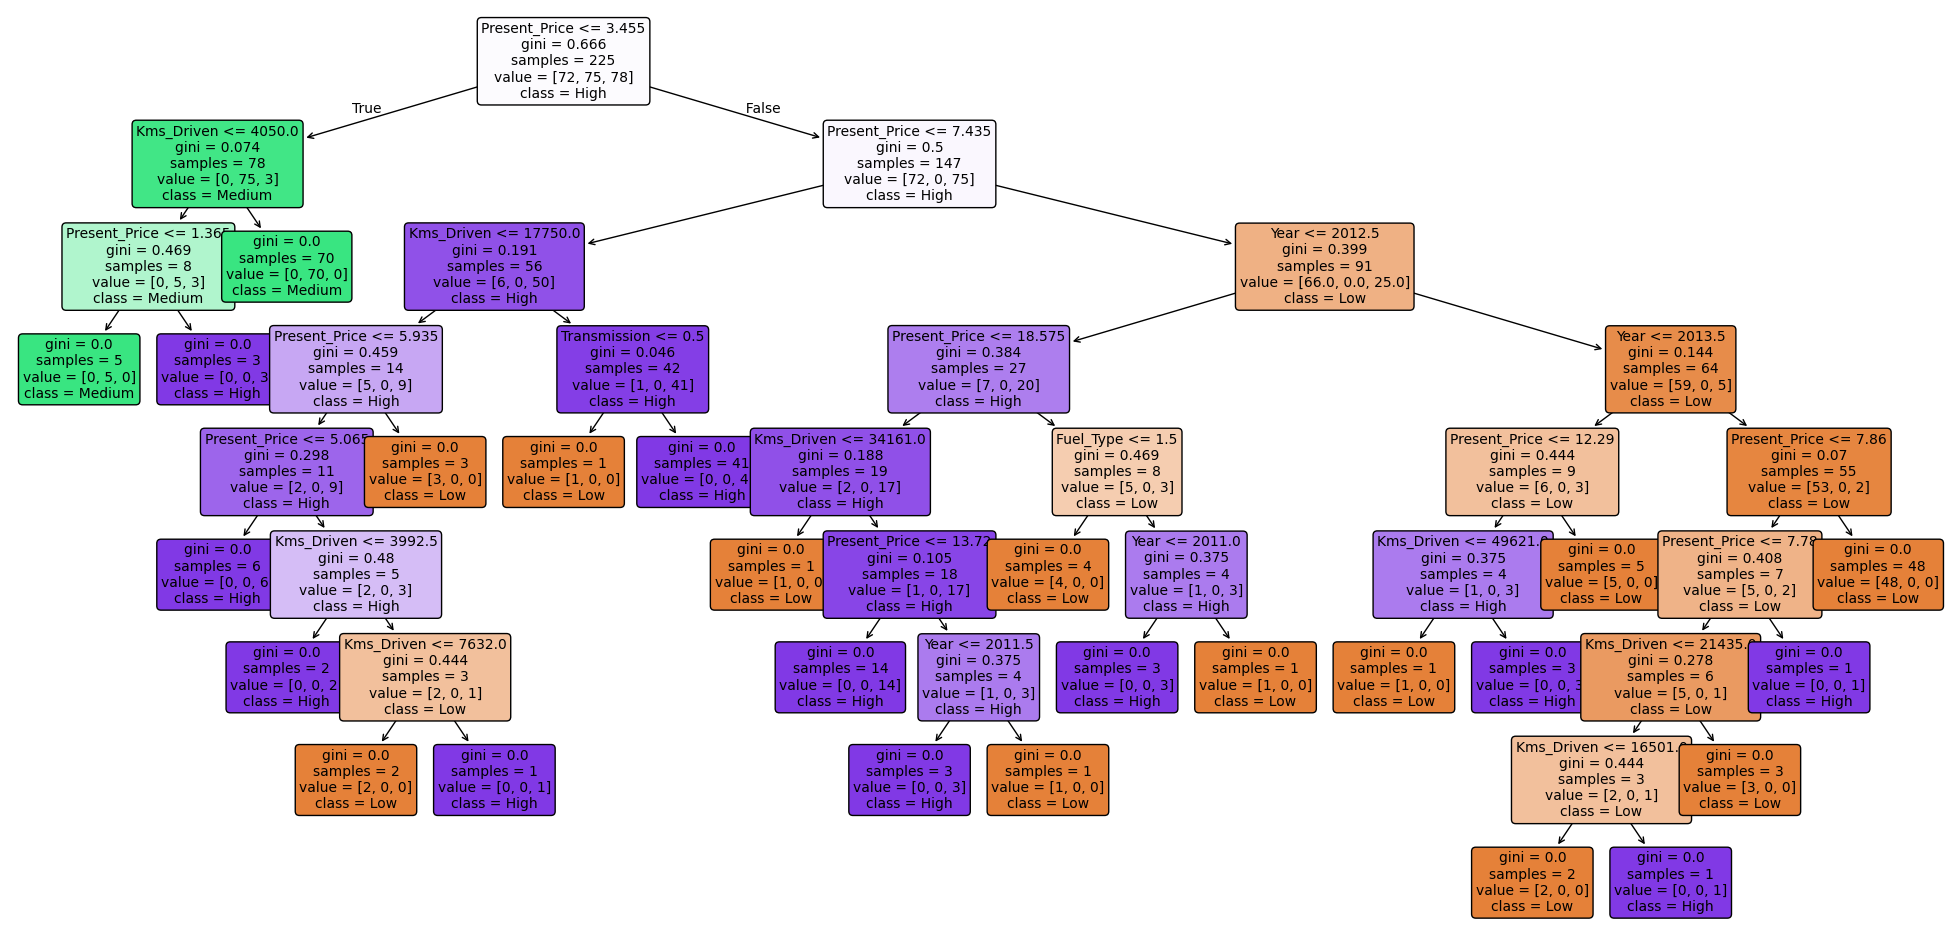

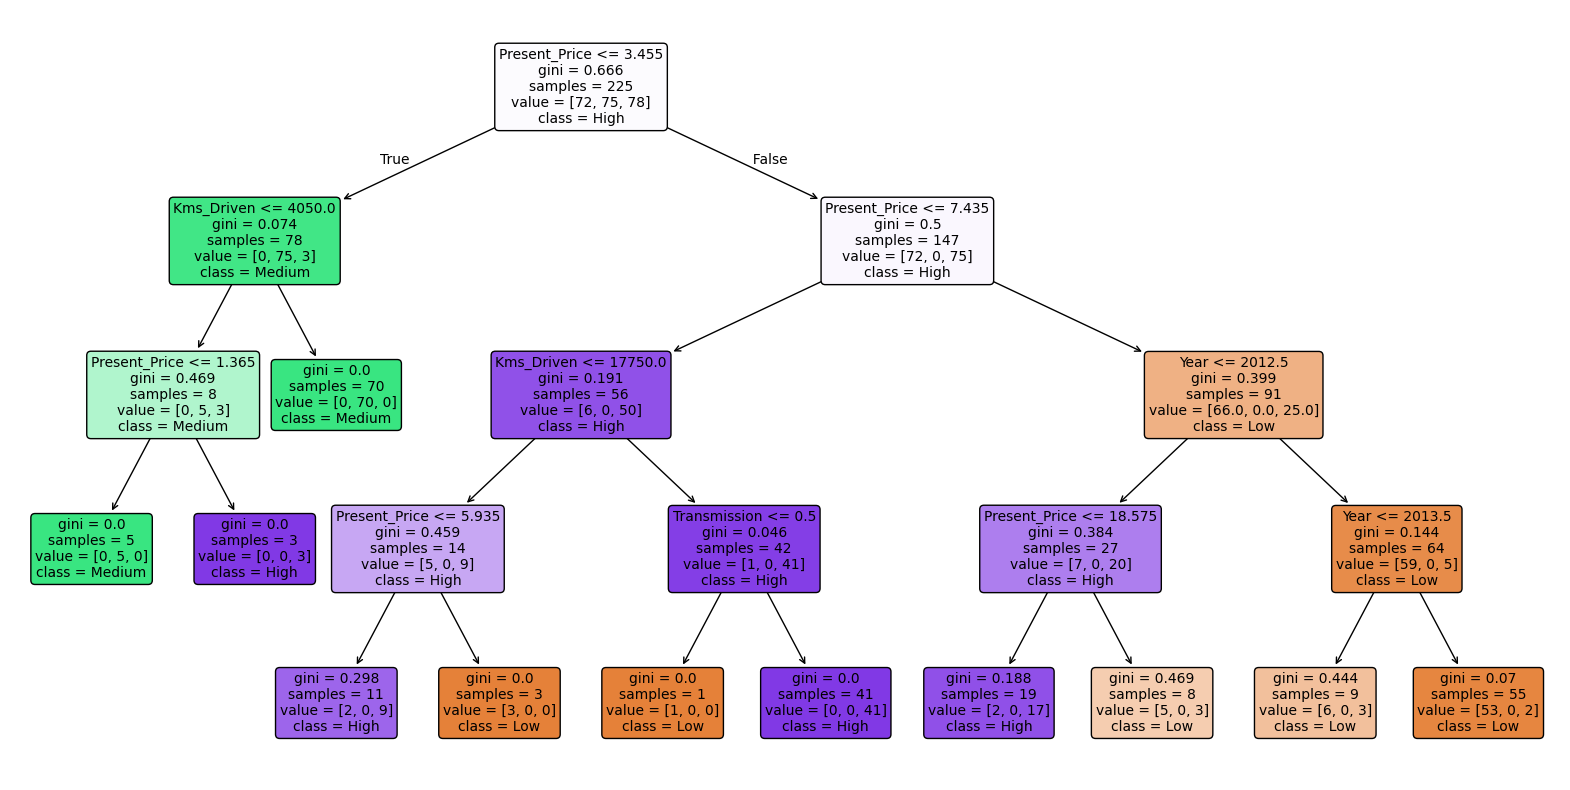

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import tree

uploaded = files.upload()
df = pd.read_csv("car data.csv")
df.head()

df['Price_Class'] = pd.qcut(
    df['Selling_Price'], q=3, labels=['Low', 'Medium', 'High']
)

print(df['Price_Class'].value_counts())
df[['Selling_Price', 'Price_Class']].head(10)

df = df.drop(columns=['Car_Name', 'Selling_Price'])
df.head()

le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Price_Class']:
    df[col] = le.fit_transform(df[col])

df.head()

X = df.drop(columns=['Price_Class'])
y = df['Price_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print(tree.export_text(dt, feature_names=list(X.columns)))

plt.figure(figsize=(25, 12))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_limited,
    feature_names=X.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


Saving car data.csv to car data (1).csv
Price class distribution:
Price_Class
Medium    104
Low       100
High       97
Name: count, dtype: int64

=== Random Forest ===
Accuracy: 0.9079

Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.92      0.90        25
      Medium       0.96      0.96      0.96        25
        High       0.88      0.85      0.86        26

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



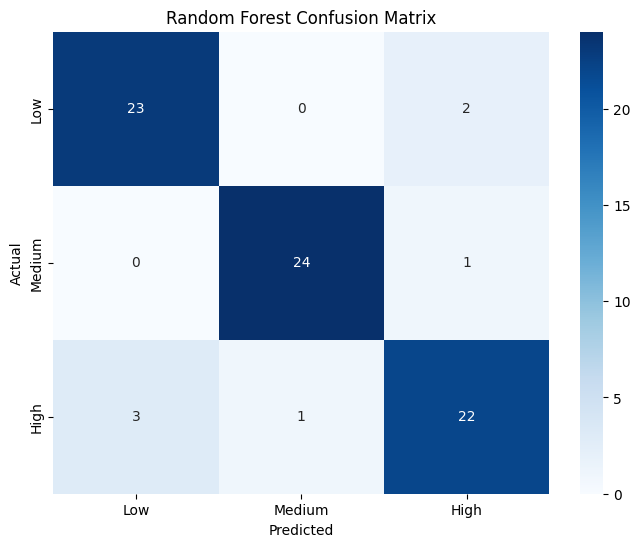

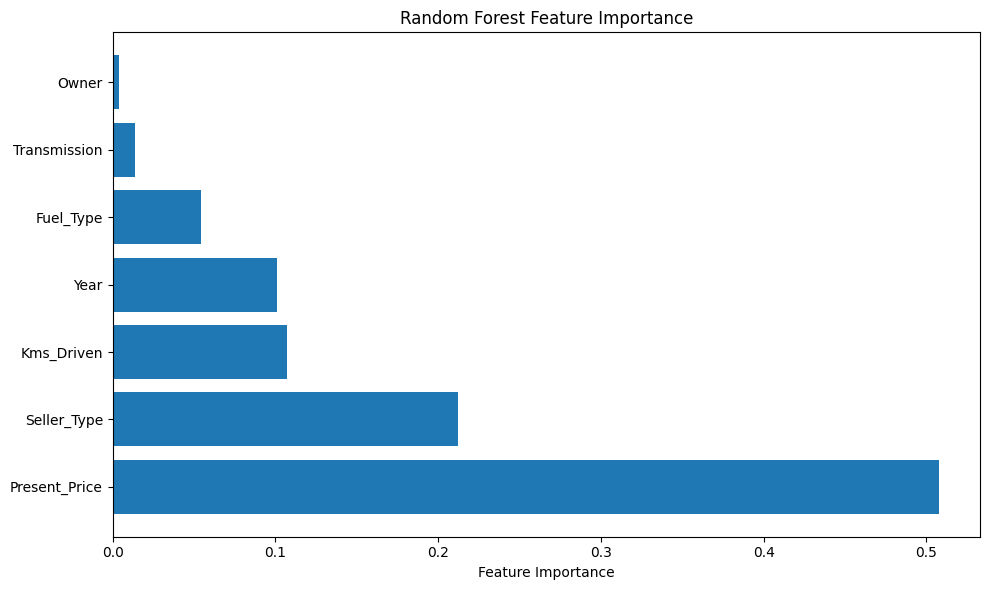

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ────────────────────────────────────────────────
# 1. Upload and read the file
uploaded = files.upload()
df = pd.read_csv("car data.csv")

# ────────────────────────────────────────────────
# 2. Create price classes (same as your code)
df['Price_Class'] = pd.qcut(
    df['Selling_Price'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

print("Price class distribution:")
print(df['Price_Class'].value_counts())

# ────────────────────────────────────────────────
# 3. Drop unnecessary columns
df = df.drop(columns=['Car_Name', 'Selling_Price'])

# ────────────────────────────────────────────────
# 4. Label encode categorical columns + target
le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Price_Class']:
    df[col] = le.fit_transform(df[col])

# ────────────────────────────────────────────────
# 5. Features and target
X = df.drop(columns=['Price_Class'])
y = df['Price_Class']

# ────────────────────────────────────────────────
# 6. Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ────────────────────────────────────────────────
# 7. Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=None,            # let trees grow fully (or set e.g. 10–15)
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',       # common good default
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

rf.fit(X_train, y_train)

# ────────────────────────────────────────────────
# 8. Predictions & Evaluation
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ────────────────────────────────────────────────
# 9. Feature Importance (very useful with Random Forest)
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()